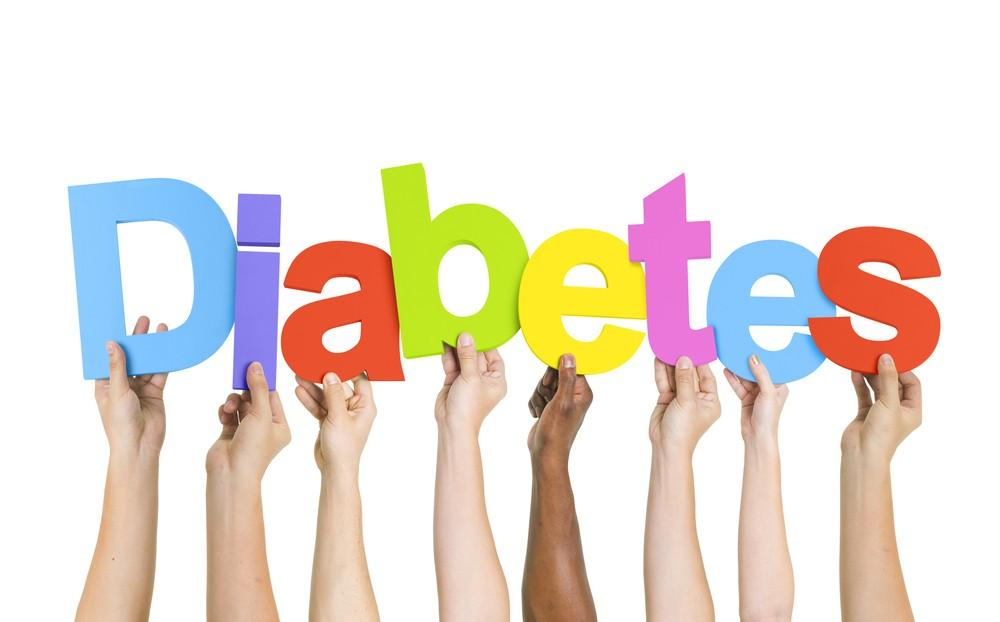

Realized by : ISMAIL LAMAAKAL

**Énoncé du problème**

Le diabète est l’une des maladies les plus fréquentes dans le monde et le nombre de patients diabétiques augmente au fil des ans. La cause principale du diabète reste inconnue, mais les scientifiques pensent que les facteurs génétiques et le mode de vie environnemental jouent un rôle majeur dans le diabète.

Les personnes atteintes de diabète courent un risque de développer certains problèmes de santé secondaires tels que les maladies cardiaques et les lésions nerveuses. Ainsi, la détection précoce et le traitement du diabète peut prévenir les complications et aider à réduire le risque de problèmes de santé graves. Même s’il est incurable, il peut être géré par un traitement et des médicaments.

**Objective:**

Construire un modèle pour prédire si une personne est à risque de diabète ou non.



***Description du DataSet :***





*   Grossesses : Nombre de grossesses
*   Glucose : Concentration plasmatique de glucose sur 2 heures dans un test de tolérance au glucose par voie orale

*   Pression artérielle: Pression artérielle diastolique (mm Hg)
*   SkinThickness: Épaisseur du pli cutané du triceps (mm)

*   Insuline: insuline sérique de 2 heures (mu U / ml*

*   IMC: Indice de masse corporelle (poids en kg/(taille en m)^2)
*   Pedigree: Fonction de pedigree du diabète - Une fonction qui note la probabilité de diabète en fonction des antécédents familiaux.

*  Âge: Âge en années
*  Classe : Variable de classe (0 : la personne n’est pas diabétique ou 1 : la personne est diabétique)











**Questions**



1.   Quels sont les facteurs qui influent sur la probabilité de diabète?
2.   Les antécédents familiaux de diabète peuvent-ils augmenter les chances de daibetes chez les patients.

1.   À mesure que le nombre de grossesses augmente, augmente-t-il les chances que les femmes contractent le diabète?






# Importations des bibliotheques

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


## Lire et comprendre les données


In [3]:
data = pd.read_csv("diabetes.csv",sep = ',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**observations**



*   L’ensemble de données contient des femmes ayant une moyenne de 4 grossesses et un maximum de 17.

*   Des caractéristiques telles que le glucose, la pression artérielle, la douleur de la peau et l’insuline ont des valeurs minimales de 0, ce qui peut être des erreurs de saisie de données et devrait l’explorer davantage.

*   Différence entre la valeur maximale pour des caractéristiques telles que la maladie de la peau, l’insuline et l’âge et le 3ème quartile qui suggère qu’il pourrait y avoir des valeurs aberrantes présentes dans les données.

*  L’âge moyen des femmes dans l’ensemble de données est de 33 ans et la médiane est de 29 ans.



In [6]:
#Check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**observations**



*   Toutes les variables sont des types entiers ou flottants.
*   Le résultat est notre variable cible.



## Exploratory Data Analysis


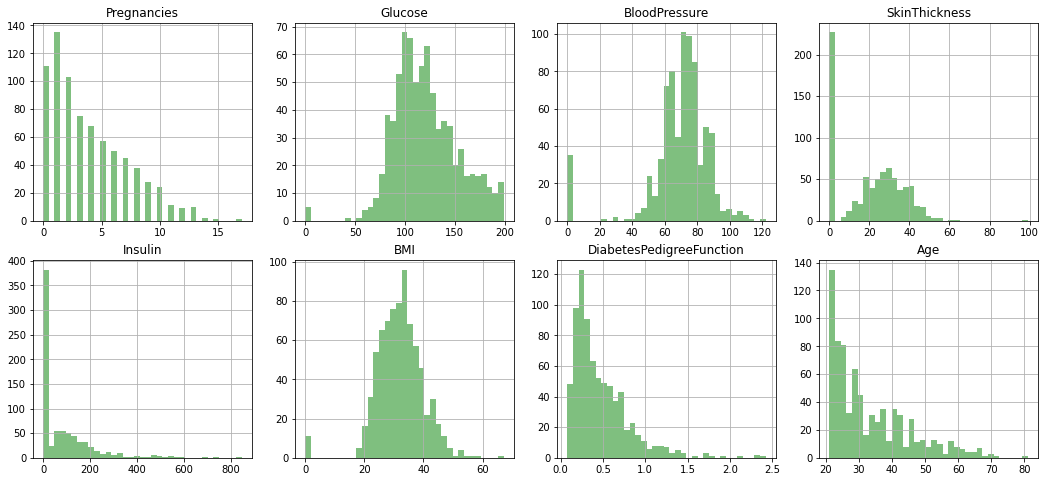

In [7]:
featuresName = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, featureName in enumerate(featuresName):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    data[featureName].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(featureName)

In [8]:
cols = ["Glucose", "BloodPressure", "Insulin","SkinThickness", "BMI"]
for col in cols:
    data[col].replace(0
    ,np.NaN,inplace=True)
data.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
for col in data.columns:
    data.loc[(data["Outcome"]==0) & (data[col].isnull()),col] = data[data["Outcome"]==0][col].median()
    data.loc[(data["Outcome"]==1) & (data[col].isnull()),col] = data[data["Outcome"]==1][col].median()

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

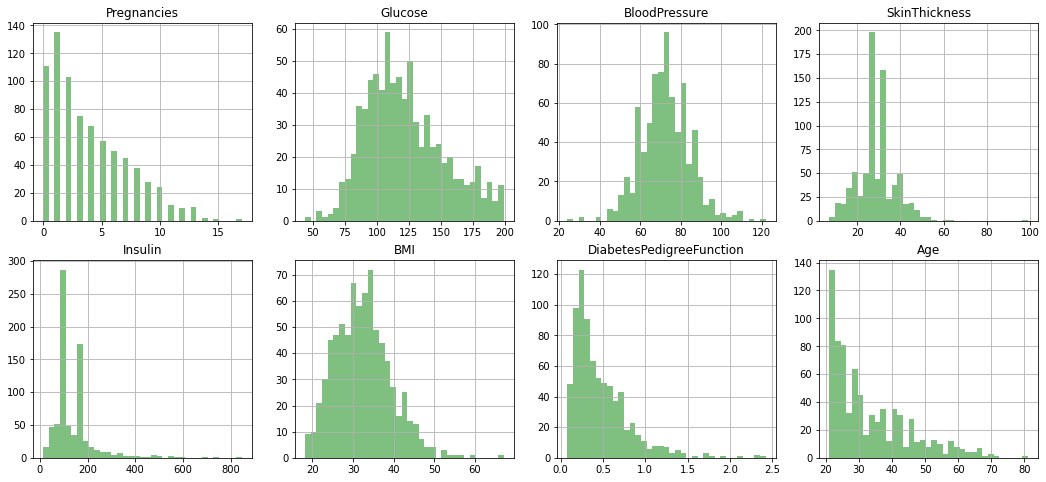

In [11]:
featuresName = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, featureName in enumerate(featuresName):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    data[featureName].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(featureName)

# Les relations entre target 

## relation entre Pregnancies et Outcome



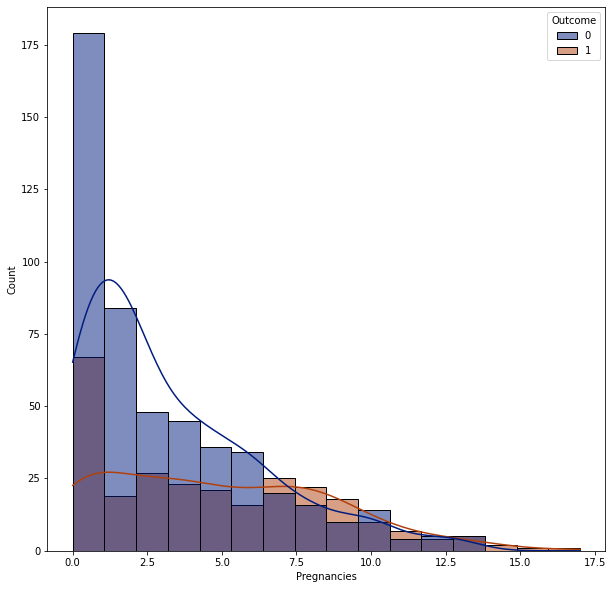

In [12]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Pregnancies", hue = "Outcome",data=data, kde = True,palette="dark")

## relation entre Glucose et Outcome




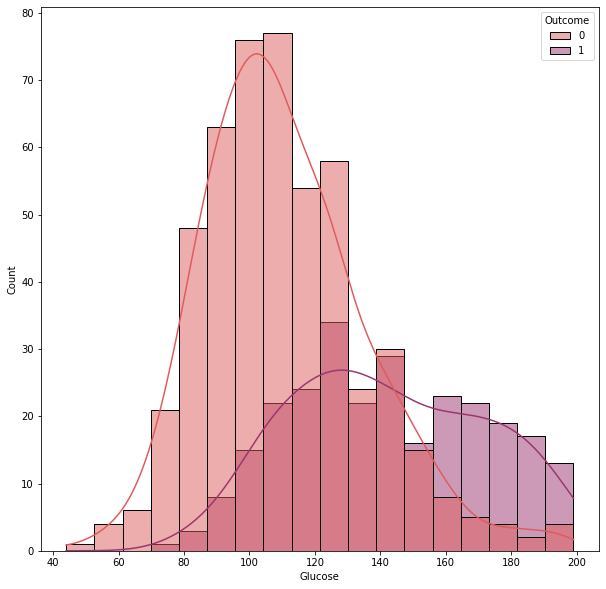

In [13]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Glucose", hue = "Outcome",data=data, kde = True,palette = "flare")

## relation entre BloodPressure et Outcome


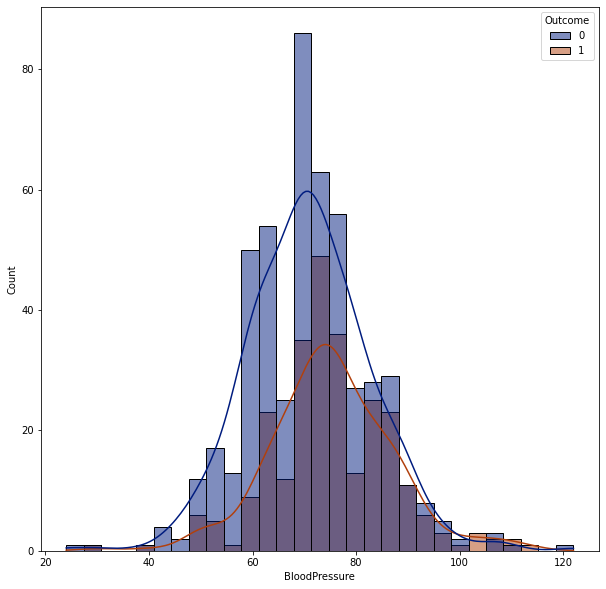

In [14]:
plt.figure(figsize = (10,10))
sns.histplot(x ="BloodPressure", hue = "Outcome",data=data, kde = True,palette = "dark")

## relation entre SkinThickness et Outcome


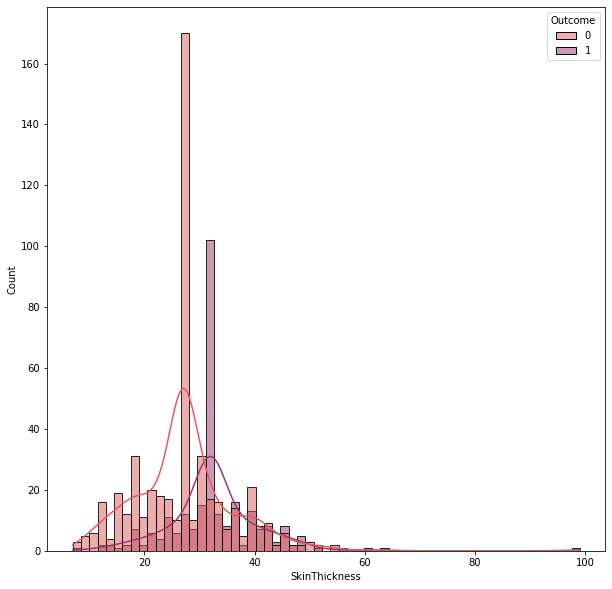

In [15]:
plt.figure(figsize = (10,10))
sns.histplot(x ="SkinThickness", hue = "Outcome",data=data, kde = True,palette="flare")

## relation entre Insulin et Outcome


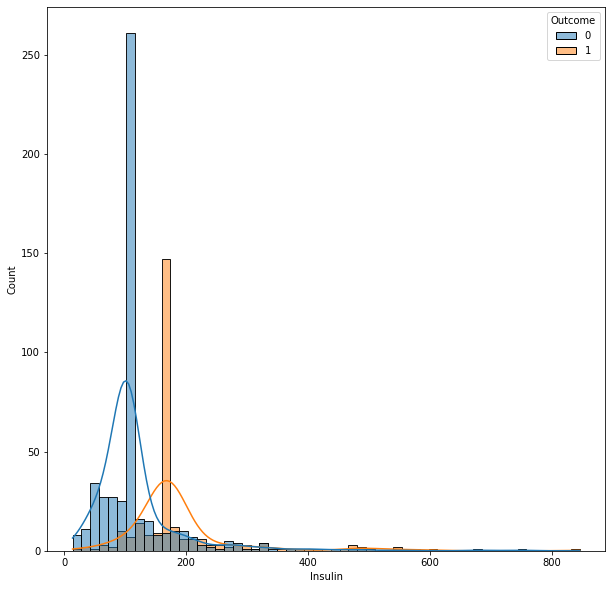

In [16]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Insulin", hue = "Outcome",data=data, kde = True)

## relation entre BMI et Outcome

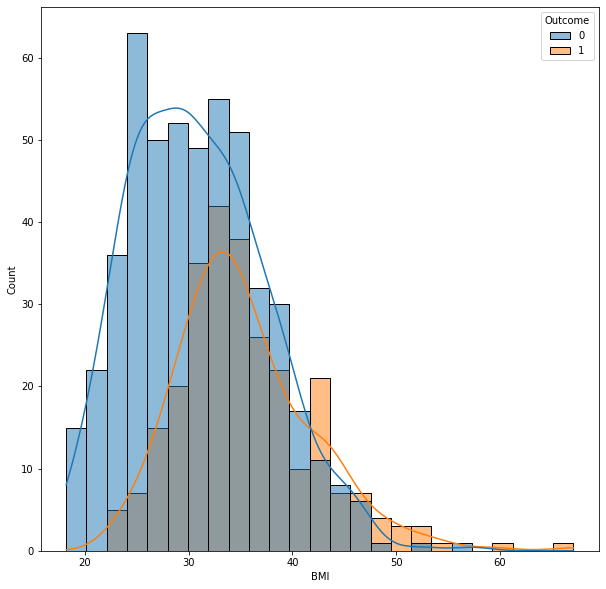

In [17]:
plt.figure(figsize = (10,10))
sns.histplot(x ="BMI", hue = "Outcome",data=data, kde = True)

## relation entre Age et Outcome

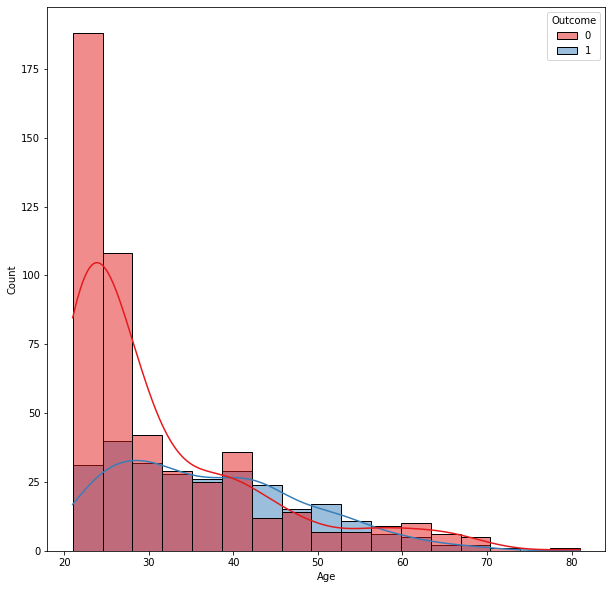

In [18]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Age", hue = "Outcome",data=data, kde = True,palette="Set1")

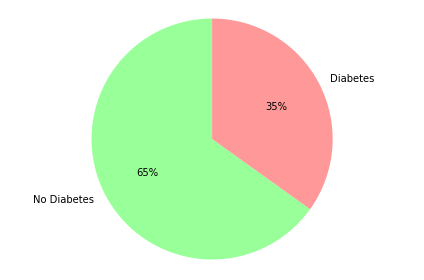

In [19]:
import matplotlib.pyplot as plt
import numpy as np
s0 = np.sum(data["Outcome"] == 0)
s1 = np.sum(data["Outcome"] == 1)
# plt.pie([s0, s1], labels = ['No Diabetes', 'Diabetes'], autopct='%1.2f%%')
# plt.show()
 
fig1, ax1 = plt.subplots()
ax1.pie([s0, s1], labels=['No Diabetes', 'Diabetes'], autopct='%1.0f%%', startangle=90, colors = ['#99ff99','#ff9999'])
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Handling Outliers

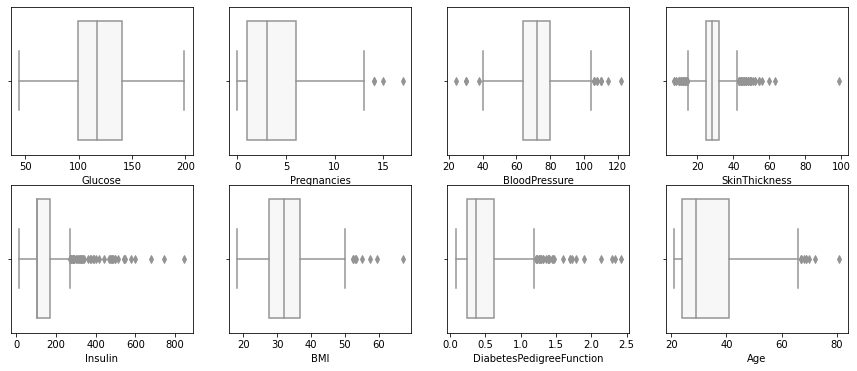

In [20]:
# Plotting the box plot of the whole dataset using seaborn
def plot_box():
  f, axes = plt.subplots(2, 4, figsize=(15, 6))

  sns.boxplot(x= "Glucose", data=data, palette="PRGn", ax=axes[0,0])
  sns.boxplot(x="Pregnancies", data=data, palette="PRGn", ax=axes[0,1])
  sns.boxplot(x="BloodPressure", data=data, palette="PRGn", ax=axes[0,2])
  sns.boxplot(x="SkinThickness", data=data, palette="PRGn", ax=axes[0,3])
  sns.boxplot(x= "Insulin", data=data, palette="PRGn", ax=axes[1,0])
  sns.boxplot(x="BMI", data=data, palette="PRGn", ax=axes[1,1])
  sns.boxplot(x="DiabetesPedigreeFunction", data=data, palette="PRGn", ax=axes[1,2])
  sns.boxplot(x="Age", data=data, palette="PRGn", ax=axes[1,3])


  plt.show()

plot_box()

detect and remove Outlires

In [21]:
# calculate Q1 and Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
12,10,139.0,80.0,27.0,102.5,27.1,1.441,57,0
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
713,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0
715,7,187.0,50.0,33.0,392.0,33.9,0.826,34,1
718,1,108.0,60.0,46.0,178.0,35.5,0.415,24,0
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


In [22]:
#Remove Outliers
#data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


768


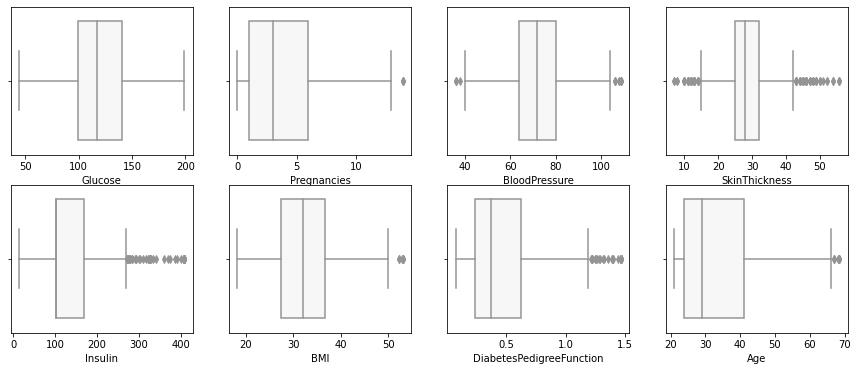

768


In [23]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    return val
print(len(data))
for col in data.columns:
    mean = data[col].mean()
    std_dev = data[col].std(axis=0)
    data[col] = data[col].map(lambda x: replace_outlier(x, mean, std_dev))
plot_box()
print(len(data))

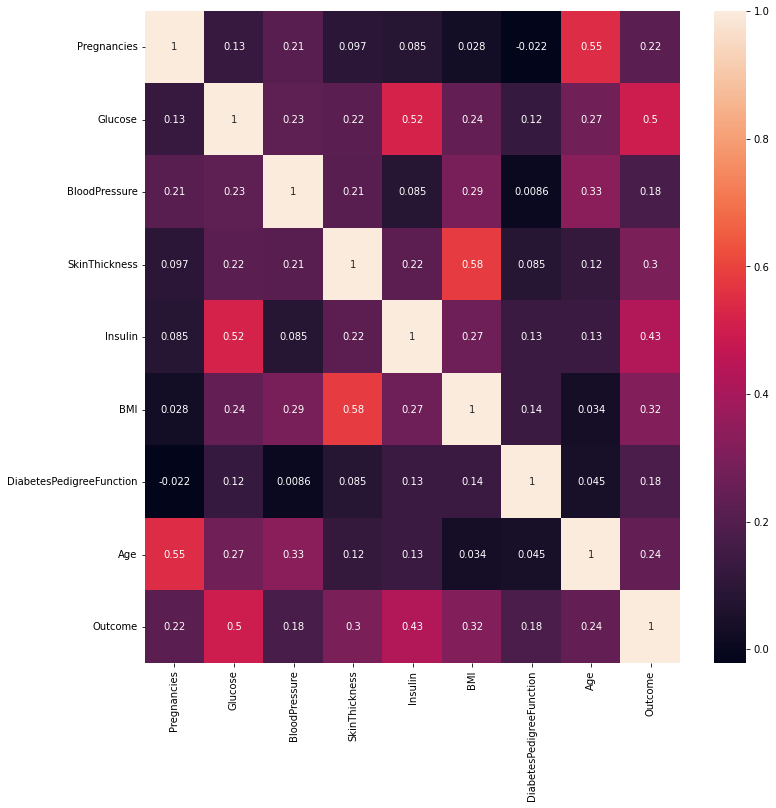

In [24]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,ax=ax)
plt.show()

les consclusions de EDA




*   ‎Il n’y a pas de valeurs NaN dans les données.‎
*   ‎Ils sont un nombre très inférieur de valeurs aberrantes dans toutes les fonctionnalités.‎


*   ‎Il n’y a pas de corrélation linéaire apparente entre les variables de caractéristiques selon la carte thermique.‎

*   ‎BloodPressure se situe entre 40 et 100, et il y a moins de personnes atteintes de diabète dans ce range.






# Preprocesseing

## Feature Engineering

In [25]:
data_feature_eng=data 
data_feature_eng['glu/bmi']=data_feature_eng['Glucose']/data_feature_eng['BMI']                                                   
data_feature_eng['ins/bmi']=data_feature_eng['Insulin']/data_feature_eng['BMI']
data_feature_eng['glu/ins']=data_feature_eng['Glucose']/data_feature_eng['Insulin']
data_feature_eng['bp/glu']=data_feature_eng['BloodPressure']/data_feature_eng['Glucose']
data_feature_eng['skn/bmi']=data_feature_eng['SkinThickness']/data_feature_eng['BMI']
data_feature_eng['bp/bmi']=data_feature_eng['BloodPressure']/data_feature_eng['BMI']
data_feature_eng['preg/agr']=data_feature_eng['Pregnancies']/data_feature_eng['Age']

data_feature_eng['bp/ins']=data_feature_eng['BloodPressure']/data_feature_eng['Insulin']

In [26]:
data_feature_eng

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glu/bmi,ins/bmi,glu/ins,bp/glu,skn/bmi,bp/bmi,preg/agr,bp/ins
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627000,50.0,1,4.404762,5.044643,0.873156,0.486486,1.041667,2.142857,0.120000,0.424779
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351000,31.0,0,3.195489,3.853383,0.829268,0.776471,1.090226,2.481203,0.032258,0.643902
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672000,32.0,1,7.854077,7.274678,1.079646,0.349727,1.373391,2.746781,0.250000,0.377581
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0,3.167260,3.345196,0.946809,0.741573,0.818505,2.348754,0.047619,0.702128
4,0.0,137.0,40.0,35.0,168.0,43.1,1.465862,33.0,1,3.178654,3.897912,0.815476,0.291971,0.812065,0.928074,0.000000,0.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0,3.069909,5.471125,0.561111,0.752475,1.458967,2.310030,0.158730,0.422222
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340000,27.0,0,3.315217,2.785326,1.190244,0.573770,0.733696,1.902174,0.074074,0.682927
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0,4.618321,4.274809,1.080357,0.595041,0.877863,2.748092,0.166667,0.642857
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349000,47.0,1,4.186047,5.631229,0.743363,0.476190,1.063123,1.993355,0.021277,0.353982


In [27]:
#data without feature eng 
x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data['Outcome']


In [28]:
#data with feature eng 
xf = data_feature_eng [['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','glu/bmi','ins/bmi','glu/ins','bp/glu','skn/bmi','bp/bmi','preg/agr','bp/ins']]
yf = data_feature_eng['Outcome']

#Séparation des données : Train(80%)/Test(20%) 

In [29]:
#split data without feature eng 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6.0,98.0,58.0,33.0,190.0,34.0,0.430,43.0
324,2.0,112.0,75.0,32.0,102.5,35.7,0.148,21.0
624,2.0,108.0,64.0,27.0,102.5,30.8,0.158,21.0
690,8.0,107.0,80.0,27.0,102.5,24.6,0.856,34.0
473,7.0,136.0,90.0,27.0,102.5,29.9,0.210,50.0
...,...,...,...,...,...,...,...,...
355,9.0,165.0,88.0,32.0,169.5,30.4,0.302,49.0
534,1.0,77.0,56.0,30.0,56.0,33.3,1.251,24.0
344,8.0,95.0,72.0,27.0,102.5,36.8,0.485,57.0
296,2.0,146.0,70.0,38.0,360.0,28.0,0.337,29.0


In [31]:
np_df = np.array(x_test)
print(np_df[0])

[  6.    98.    58.    33.   190.    34.     0.43  43.  ]


In [32]:
#split data with feature eng
x_trainf, x_testf, y_trainf, y_testf = train_test_split(xf, yf, test_size=0.2, random_state=42)

### **La correction de deséquilibre de target**

In [33]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
np.bincount(y_train)

array([401, 401])

In [34]:
smt = SMOTE()
x_trainf, y_trainf = smt.fit_resample(x_trainf, y_trainf)
np.bincount(y_trainf)

array([401, 401])

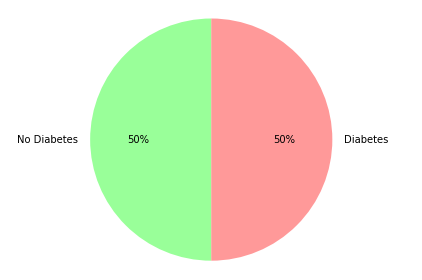

In [35]:
s0 = np.sum(y_train== 0)
s1 = np.sum(y_train== 1)
# plt.pie([s0, s1], labels = ['No Diabetes', 'Diabetes'], autopct='%1.2f%%')
# plt.show()
 
fig1, ax1 = plt.subplots()
ax1.pie([s0, s1], labels=['No Diabetes', 'Diabetes'], autopct='%1.0f%%', startangle=90, colors = ['#99ff99','#ff9999'])
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [36]:
print('Data without feature eng :')
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print('Data with feature eng :')
print(x_trainf.shape, x_testf.shape, y_trainf.shape, y_testf.shape)

Data without feature eng :
(802, 8) (154, 8) (802,) (154,)
Data with feature eng :
(802, 16) (154, 16) (802,) (154,)


In [37]:
from sklearn.preprocessing import StandardScaler

Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(x_train)
X_test = Sc_X.transform(x_test)

In [38]:
Sc_Xf = StandardScaler()
x_trainf = Sc_Xf.fit_transform(x_trainf)
x_testf = Sc_Xf.transform(x_testf)

In [39]:
x_trainf

array([[-0.59742583, -1.36221812, -0.23558878, ...,  0.0868942 ,
        -0.17751484,  0.10932983],
       [ 1.57356068, -0.46229687,  0.82007229, ...,  1.22565897,
         0.90699139, -0.3457661 ],
       [-0.90756676,  0.40548434, -2.34691092, ..., -1.32681926,
        -0.81448224, -0.18479561],
       ...,
       [ 1.00054496,  0.4098324 ,  0.9065382 , ...,  1.40695611,
         0.87032411,  2.81294338],
       [ 0.9429764 , -0.62833532,  0.13967657, ...,  0.43858716,
         1.46793715, -0.45003842],
       [ 1.09902358, -0.48863835, -0.51537553, ...,  0.06942047,
         1.45786249, -0.55042677]])

In [40]:
print('Data with feature eng :')
print(x_trainf.shape, x_testf.shape, y_trainf.shape, y_testf.shape)

Data with feature eng :
(802, 16) (154, 16) (802,) (154,)


In [41]:
from sklearn.metrics import classification_report
def print_score(y_test,y_pred):
  clsreport = classification_report(y_test, y_pred)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print('MCC : ', matthews_corrcoef(y_test, y_pred))

In [42]:
def handling_model(model,x_train,y_train,x_test):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
  plot_confusion_matrix(model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['Not sick', 'Sick'])
  print_score(y_test,y_pred)

# **logistic regression**

### logistic regression sans features  engineering

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        99
           1       0.63      0.82      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.79      0.77      0.77       154

[[73 26]
 [10 45]]
MCC :  0.5340208533124303


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


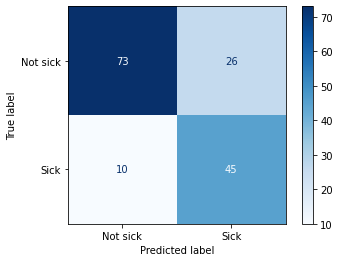

In [43]:
modele_regLog = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
handling_model(modele_regLog,x_train,y_train,x_test)

### logistic regression avec features  engineering

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.70      0.79        99
           1       0.62      0.87      0.72        55

    accuracy                           0.76       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.80      0.76      0.76       154

[[69 30]
 [ 7 48]]
MCC :  0.5459951110299028


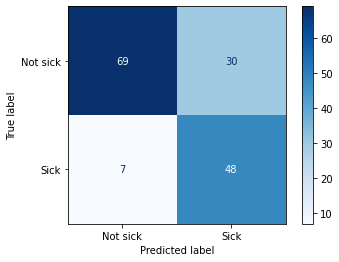

In [44]:
modele_regLog = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
handling_model(modele_regLog,x_trainf,y_trainf,x_testf)

### grid search sans features engineering

In [45]:
from sklearn.model_selection import GridSearchCV
# log
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


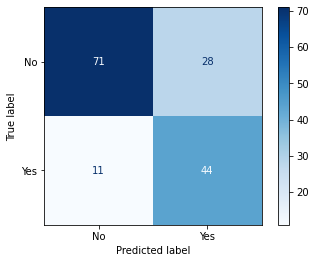

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [47]:
print(len(y_test) ,len(x_test), len(y_pred))
print_score(y_test,y_pred)

154 154 154
              precision    recall  f1-score   support

           0       0.87      0.72      0.78        99
           1       0.61      0.80      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.75       154

[[71 28]
 [11 44]]
MCC :  0.49666154365836673


### grid search avec features engineering

In [48]:
from sklearn.model_selection import GridSearchCV
# log
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(x_trainf, y_trainf)
y_predf = log_model.predict(x_testf)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [49]:
best_parms_log = log_model.best_params_
print(best_parms_log)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


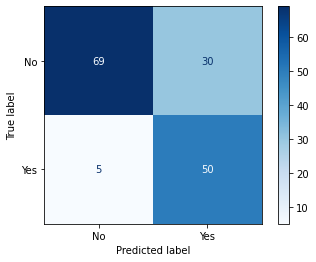

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [51]:
print_score(y_testf,y_predf)

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        99
           1       0.62      0.91      0.74        55

    accuracy                           0.77       154
   macro avg       0.78      0.80      0.77       154
weighted avg       0.82      0.77      0.78       154

[[69 30]
 [ 5 50]]
MCC :  0.5812381937190964


# **Gaussian naive bayes**

### gaussian naive bayes sans features engineering

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        99
           1       0.63      0.82      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.79      0.77      0.77       154

[[73 26]
 [10 45]]
MCC :  0.5340208533124303


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


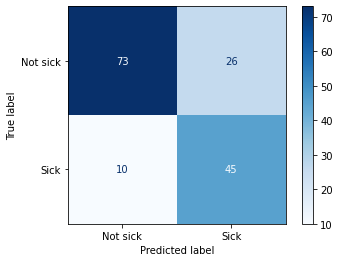

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
handling_model(gnb,x_train,y_train,x_test)

### gaussian naive bayes avec features engineering



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.79      0.84        99
           1       0.69      0.85      0.76        55

    accuracy                           0.81       154
   macro avg       0.80      0.82      0.80       154
weighted avg       0.83      0.81      0.82       154

[[78 21]
 [ 8 47]]
MCC :  0.6198936407602462


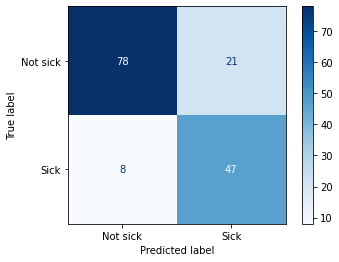

In [53]:
handling_model(gnb,x_trainf,y_trainf,x_testf)

#**Support Vector Machine**

In [54]:
import warnings
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import confusion_matrix , precision_recall_fscore_support , classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import preprocessing

### svm sans features engineering

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        99
           1       0.65      0.91      0.76        55

    accuracy                           0.79       154
   macro avg       0.79      0.82      0.79       154
weighted avg       0.83      0.79      0.80       154

[[72 27]
 [ 5 50]]
MCC :  0.6098367211363063


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


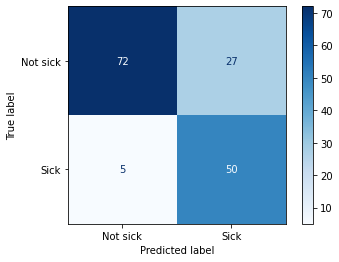

In [55]:
svc_model = SVC(kernel='linear')
handling_model(svc_model,x_train,y_train,x_test)
import pickle
pickle.dump(svc_model, open('youssef.pkl','wb'))

In [56]:
print(x_test.iloc[[1]],svc_model.predict(x_test.iloc[[1]]))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
324          2.0    112.0           75.0           32.0    102.5  35.7   

     DiabetesPedigreeFunction   Age  
324                     0.148  21.0   [0]


### svm avec features engneering

              precision    recall  f1-score   support

           0       0.94      0.74      0.82        99
           1       0.66      0.91      0.76        55

    accuracy                           0.80       154
   macro avg       0.80      0.82      0.79       154
weighted avg       0.84      0.80      0.80       154

[[73 26]
 [ 5 50]]
MCC :  0.6195689203176202


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


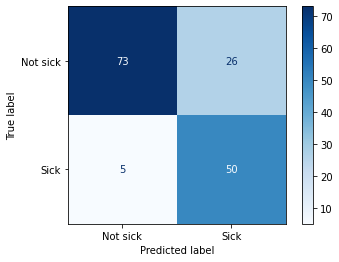

In [57]:
svc_model = SVC(kernel='linear')
handling_model(svc_model,x_trainf,y_trainf,x_testf)

### **grid** search sans features engineering

In [58]:
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


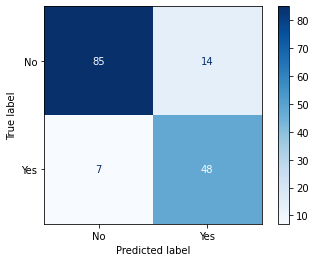

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [60]:
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        99
           1       0.77      0.87      0.82        55

    accuracy                           0.86       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.87      0.86      0.87       154

[[85 14]
 [ 7 48]]
MCC :  0.7145169820846758


### grid search avec features engineering

In [61]:
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(x_trainf, y_trainf)
y_predf = svc_model.predict(x_testf)

In [62]:
best_parms_svc = svc_model.best_params_
print(best_parms_svc)

{'C': 1, 'kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


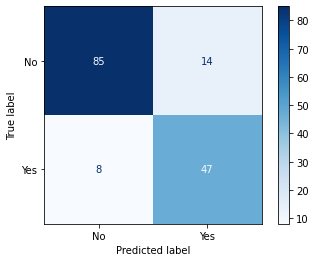

In [63]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(svc_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [64]:
print_score(y_testf,y_predf)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        99
           1       0.77      0.85      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.86      0.86      0.86       154

[[85 14]
 [ 8 47]]
MCC :  0.6986538501593476


# **Decision tree**

### decision tree sans features engineering

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        99
           1       0.76      0.82      0.79        55

    accuracy                           0.84       154
   macro avg       0.83      0.84      0.83       154
weighted avg       0.85      0.84      0.85       154

[[85 14]
 [10 45]]
MCC :  0.6670382550499404


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


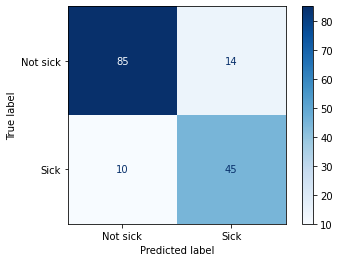

In [65]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion='gini')
handling_model(dt_model,x_train,y_train,x_test)

### decision tree avec features engineering

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        99
           1       0.78      0.82      0.80        55

    accuracy                           0.85       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.85      0.85      0.85       154

[[86 13]
 [10 45]]
MCC :  0.6792396771042942


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


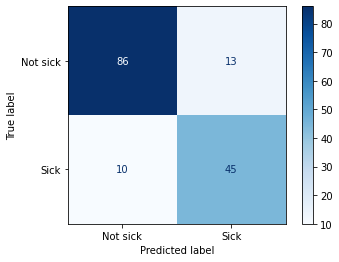

In [66]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion='entropy')
handling_model(dt_model,x_trainf,y_trainf,x_testf)

### grid search sans features engineering

In [67]:

dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [None,3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(tree.DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


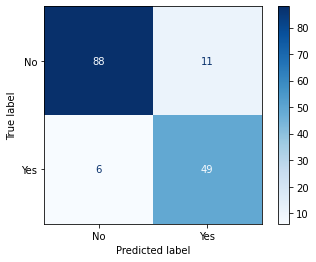

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [69]:
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [None,3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(tree.DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(x_train, y_train)
y_predf = dt_model.predict(x_test)


In [70]:
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        99
           1       0.82      0.89      0.85        55

    accuracy                           0.89       154
   macro avg       0.88      0.89      0.88       154
weighted avg       0.89      0.89      0.89       154

[[88 11]
 [ 6 49]]
MCC :  0.7661988499723655


### grid search avec features engineering

In [71]:

dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [None,3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(tree.DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(x_trainf, y_trainf)
y_predf = dt_model.predict(x_testf)


In [72]:
best_params_dt = dt_model.best_params_
best_params_dt

{'criterion': 'entropy', 'max_depth': 13, 'splitter': 'best'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


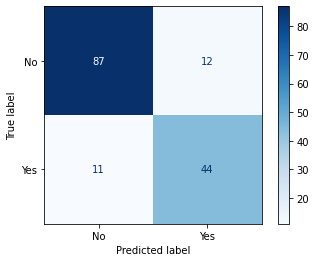

In [73]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(dt_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [74]:
print_score(y_testf,y_predf)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        99
           1       0.79      0.80      0.79        55

    accuracy                           0.85       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.85      0.85      0.85       154

[[87 12]
 [11 44]]
MCC :  0.6761234037828132


# **Ensemble Learning**

# **Random Forest**

### random forest sans features  engineering

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestClassifier(n_estimators=15)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


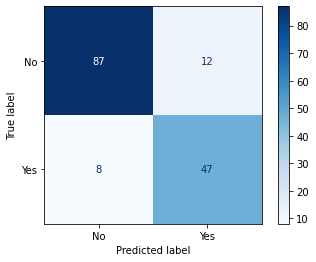

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [77]:
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        99
           1       0.80      0.85      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154

[[87 12]
 [ 8 47]]
MCC :  0.7227907062182937


### random forest avec features engineering

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestClassifier(n_estimators=15)
rf_model.fit(x_trainf, y_trainf)
y_predf = rf_model.predict(x_testf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


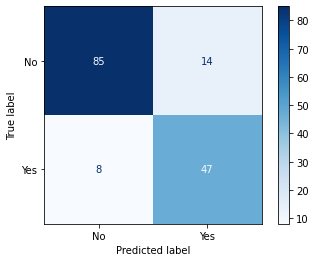

In [79]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [80]:
print_score(y_testf,y_predf)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        99
           1       0.77      0.85      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.86      0.86      0.86       154

[[85 14]
 [ 8 47]]
MCC :  0.6986538501593476


### gride seach sans features engineering

In [81]:

rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 50,5)),
             'max_depth': list(range(3, 20, 2)),
             'max_features': [None,'log2','sqrt']}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


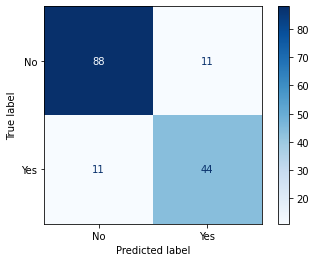

In [82]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [83]:
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        99
           1       0.80      0.80      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154

[[88 11]
 [11 44]]
MCC :  0.6888888888888889


### grid search avec features engineering

In [84]:

rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 50,5)),
             'max_depth': list(range(3, 20, 2)),
             'max_features': [None,'log2','sqrt']}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params,scoring='recall' ,cv=5)
rf_model.fit(x_trainf, y_trainf)
y_predf = rf_model.predict(x_testf)

In [85]:
best_parms_rf = rf_model.best_params_
best_parms_rf

{'criterion': 'entropy',
 'max_depth': 19,
 'max_features': 'sqrt',
 'n_estimators': 35}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


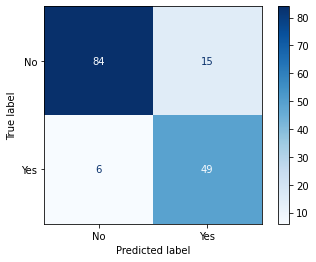

In [86]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [87]:
print_score(y_testf,y_predf)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        99
           1       0.77      0.89      0.82        55

    accuracy                           0.86       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.87      0.86      0.87       154

[[84 15]
 [ 6 49]]
MCC :  0.7188918942063234


# **Hard Voting**

In [88]:
from sklearn.ensemble import  VotingClassifier


models = [('lr', LogisticRegression(penalty=best_parms_log['penalty'],C=best_parms_log['C'], 
                                    solver=best_parms_log['solver'],
                                    )),
          ('gnb',GaussianNB()),
          ('svc', SVC(C=best_parms_svc['C'], kernel=best_parms_svc['kernel'],
                      probability=True)),
          ('dt', tree.DecisionTreeClassifier(criterion=best_params_dt['criterion'],
                                             max_depth=best_params_dt['max_depth'],
                                             splitter=best_params_dt['splitter'])),
          
          ('rf', RandomForestClassifier(n_estimators=best_parms_rf['n_estimators'],
                                        criterion=best_parms_rf['criterion'], max_depth=best_parms_rf['max_depth'],
                                        max_features=best_parms_rf['max_features']
                                        ))
          ]

In [89]:
ensemble = VotingClassifier(estimators=models, voting='hard')
y_predf = ensemble.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


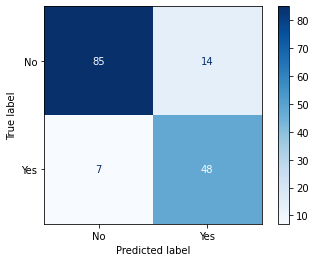

In [90]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(ensemble, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [91]:
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        99
           1       0.80      0.80      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154

[[88 11]
 [11 44]]
MCC :  0.6888888888888889


# **Soft Voting**

In [92]:
ensemble = VotingClassifier(estimators=models, voting='soft')
y_predf = ensemble.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


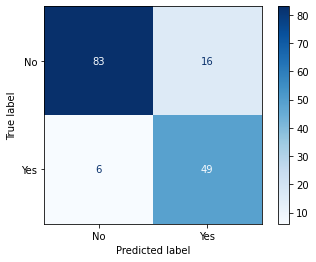

In [93]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(ensemble, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [94]:
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        99
           1       0.75      0.89      0.82        55

    accuracy                           0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154

[[83 16]
 [ 6 49]]
MCC :  0.7075371752188853


In [95]:
#Enregistrer le modèle final
import pickle
pickle.dump(svc_model, open('model1','wb'))

In [96]:
#Enregistrer le modèle final
import pickle
pickle.dump(Sc_Xf, open('Diabetes.pkl','wb'))